# Assignment1 

## Matrix 구현 
1. Linear Regression 에서 쓰이는 **정규방정식**을 행렬로 구현하고, sklearn 혹은 OLS 패키지를 통해 구한 **실제 값과 비교**해 주세요 
2. LSE에서 쓰이는 Loss Function, **MSE**를 행렬로 구현해 출력해 주세요 

### Data Load 

In [70]:
import pandas as pd 
data = pd.read_csv("assignment1.csv")

In [71]:
data.head()

,y,x1,x2,x3,x4,x5
0,10,38.9,64.7,4,868,59.7
1,13,41.6,45.3,-4,957,61.4
2,11,39.7,74.1,8,786,61.0
3,7,37.3,48.0,19,984,67.5
4,10,39.5,51.9,6,700,57.2


In [72]:
data.shape # y:(9,1), X:(9,5)

(9, 6)

In [73]:
X = data.drop(["y"], axis=1)
y = data.y

In [74]:
# matrix 계산을 위해 numpy 형태로 바꾸어 줍니다 
X = X.to_numpy()
y = y.to_numpy()

### 1. Normal Equation

In [75]:
import numpy as np
from numpy.linalg import inv 

In [78]:
def estimate_beta(X, y):
    
    designX = np.vstack([np.ones(X.shape[0]),X.T]).T 
    beta_hat = np.dot(np.dot(inv(np.dot(designX.T,designX)),designX.T),y)
    
    return beta_hat

In [80]:
beta_hat = estimate_beta(X, y)
beta_hat

array([-3.92447368e+01,  1.31232583e+00,  8.53744361e-02,  7.41849897e-02,
        1.50018573e-02, -3.42273652e-01])

#### 실제 값과 비교

In [81]:
from sklearn.linear_model import LinearRegression

In [85]:
model = LinearRegression()
model.fit(X, y)

pred = model.predict(X)

In [86]:
print(model.intercept_) # intercept
print(model.coef_) # 추정된 회귀계수 (intercept제외)

-39.24473678135658
[ 1.31232583  0.08537444  0.07418499  0.01500186 -0.34227365]


In [87]:
X.shape

(9, 5)

### 2. MSE

In [92]:
def MSE(X, y, beta_hat):
    designX =  np.vstack([np.ones(X.shape[0]),X.T]).T 
    y_pred =  np.dot(designX,beta_hat)
    mse = (np.sum((y-y_pred) ** 2)) / (X.shape[0] - X.shape[1] - 1)
    
    return mse

In [15]:
MSE(X, y, estimate_beta(X, y))

4.846793168705742

### 3.MLE

#### 바구니 안에 파란구슬과 빨간구슬이 들어있을 때, 10개를 추출하여보니 파란구슬이 2개 빨간구슬이 8개가 추출되었습니다. 
#### 이때 바구니안에는 파란구슬과 빨간구슬이 각각 몇개있는지에 대해서 최대우도추정법을 이용해 논리적으로 설명해주세요. 
- 수식은 있어도 좋고 말로 풀어쓰셔도 좋습니다
- 추출은 복원추출을 전제로 합니다
- 글자수 제한은 없습니다. 많이 쓰라는 얘기가 아니라 정말 제한이 없습니다. 너무 부담가지고 쓰지마세요.

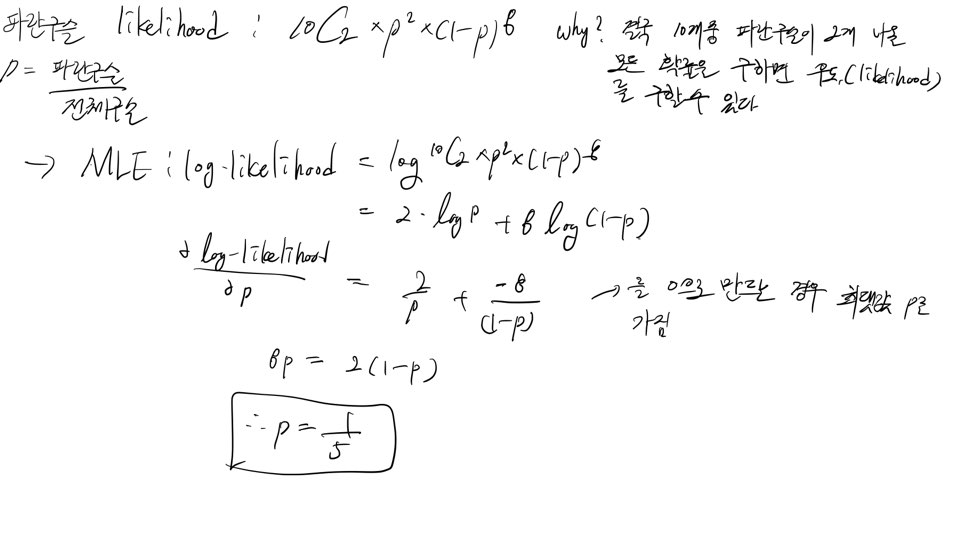

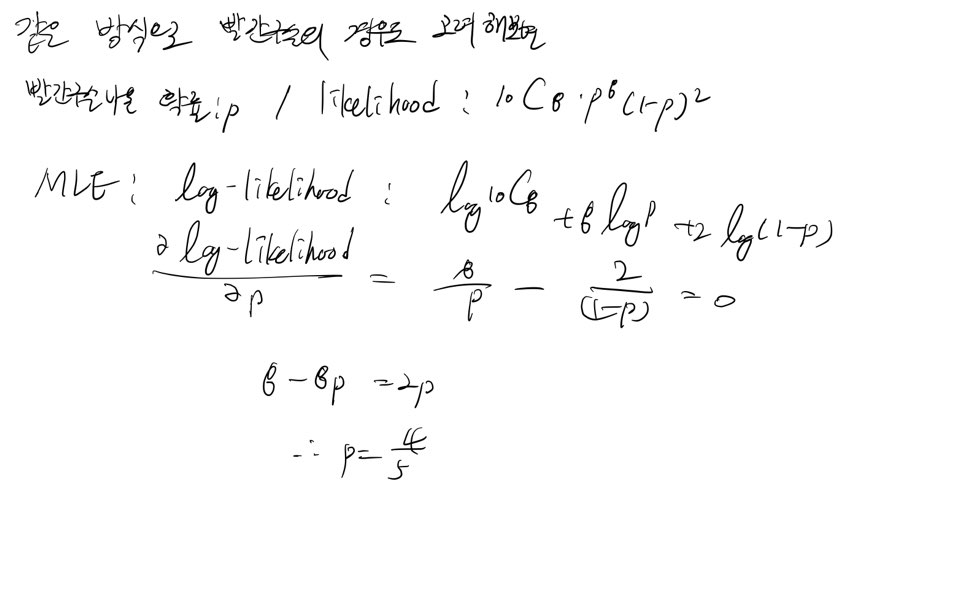